<a href="https://colab.research.google.com/github/nidhin-koshy/Notebooks/blob/master/DataHandling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Pre-processing and Cleaning

In this module we will see how to load data into Python, clean-up the data and perform basic analysis on the data.

Python has many modules that enable easy data loading and analysis. 

[Pandas](https://pandas.pydata.org/) is a Python module that helps in reading data from different input file formats like comma separated files (csv), excel spreadsheets (xls). The read data is stored in a structure called a dataframe. Pandas has numerous in-built functionalities that allow easy analysis and editing of data.  

[Seaborn](https://seaborn.pydata.org/) is another module that helps in data visualization.

##Zomato Restaurant Dataset

In [1]:
!rm -rf zomato* # Delete any old copy of the dataset
#!wget 'https://raw.githubusercontent.com/MehtaShruti/Zomato-Restaurants-Recommendations/master/csv/zomato.csv' # ! allows us to run system commands in jupyter notebooks
import os
os.system("wget 'https://raw.githubusercontent.com/MehtaShruti/Zomato-Restaurants-Recommendations/master/csv/zomato.csv'") # python way to 
!ls -l

total 2212
drwxr-xr-x 1 root root    4096 Jul  3 16:14 sample_data
-rw-r--r-- 1 root root 2257316 Jul 21 19:32 zomato.csv


In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [3]:
df_zomato = pd.read_csv('zomato.csv',encoding='latin-1')
print(df_zomato.dtypes) # display the data type for each column
df_zomato.head() # displays the first five records in the dataset


Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
df_zomato.describe() # Gives a summary of the different numerical fields in the dataset

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [5]:
print(df_zomato.columns) # print the column names
col_list = ['Restaurant Name', 'Country Code', 'City', 'Cuisines',
        'Has Table booking','Has Online delivery', 'Is delivering now', 'Switch to order menu',
        'Rating color', 'Rating text'] # list of columns whose contents we want to check
print(df_zomato.shape) # print the number of rows, number of columns
for col in col_list:
  print("Unique values in ", col, " : \n", df_zomato[col].value_counts()) # for each column in col_list count the occurrences of each unique value

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')
(9551, 21)
Unique values in  Restaurant Name  : 
 Cafe Coffee Day                   83
Domino's Pizza                    79
Subway                            63
Green Chick Chop                  51
McDonald's                        48
Keventers                         34
Pizza Hut                         30
Giani                             29
Baskin Robbins                    28
Barbeque Nation                   26
Barista                           22
Dunkin' Donuts                    22
Giani's                           22
Pind Balluchi                     20
Costa Coffee               

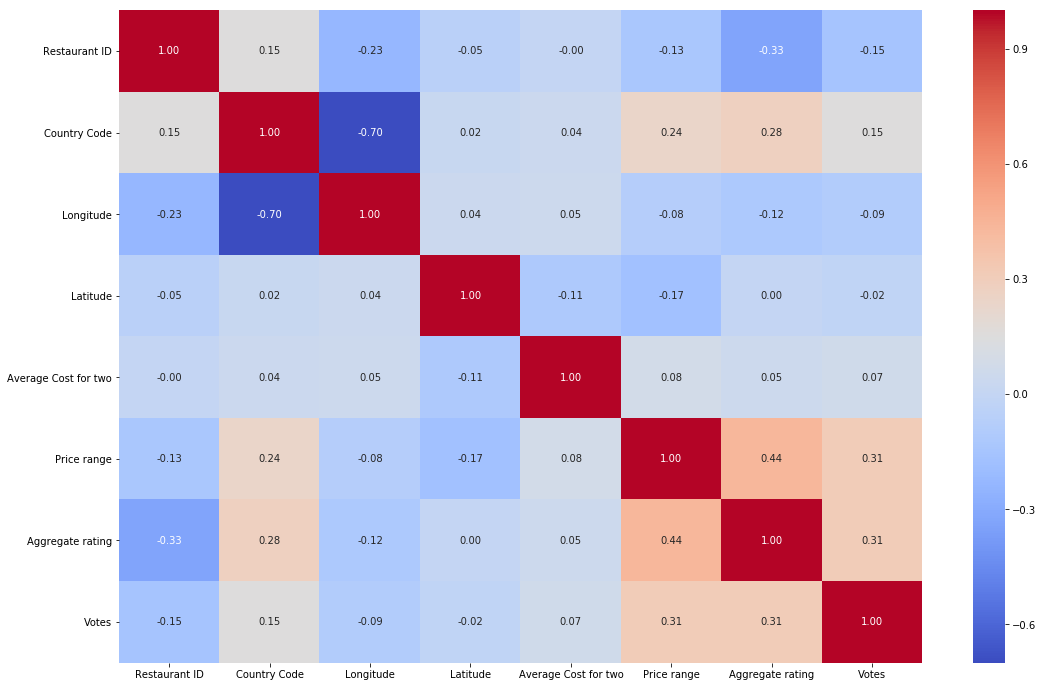

In [6]:
corr = df_zomato.corr() # compute the correlation between the different numerical columns in the dataset
plt.figure(figsize=(18,12))
hm = sns.heatmap(round(corr,2), annot=True, cmap="coolwarm",fmt='.2f') # plot the correlation matrix with an intuitive heatmap
#plt.tight_layout()

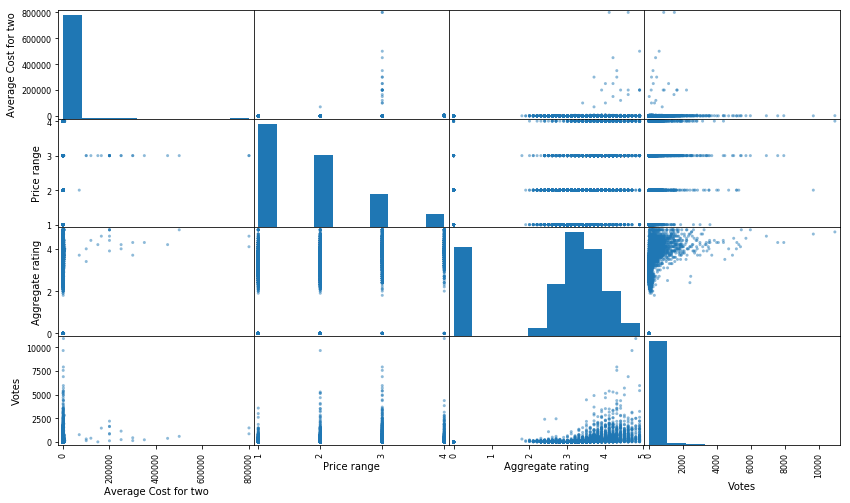

In [7]:
# a scatter plot between pairs of numerical variables, with the diagonal entries having the histogram
pd.plotting.scatter_matrix(df_zomato[["Average Cost for two","Price range","Aggregate rating","Votes"]], figsize = (14,8), diagonal = 'hist');

### Truncate Data - Restrict to datapoints from India


In [8]:
df_zomato_india = df_zomato[df_zomato['Country Code']==1] # select only rows whose Country Code = 1
#df_zomato_india = df_zomato_india.drop(columns='Country Code') # remove the country code column.
df_zomato_india.describe()


,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,8.652000e+03,8652.0,8652.000000,8652.000000,8652.000000,8652.000000,8652.000000,8652.000000
mean,8.657085e+06,1.0,72.856786,26.420652,623.370319,1.721683,2.523324,137.212552
std,8.959437e+06,0.0,18.017536,6.976576,595.676124,0.852544,1.510986,428.039513
min,5.300000e+01,1.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,3.007402e+05,1.0,77.098797,28.491425,300.000000,1.000000,2.100000,4.000000
50%,2.200006e+06,1.0,77.203468,28.569869,450.000000,2.000000,3.100000,24.000000
75%,1.836120e+07,1.0,77.285356,28.637857,700.000000,2.000000,3.600000,100.000000
max,1.850065e+07,1.0,91.806493,35.000000,8000.000000,4.000000,4.900000,10934.000000


Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


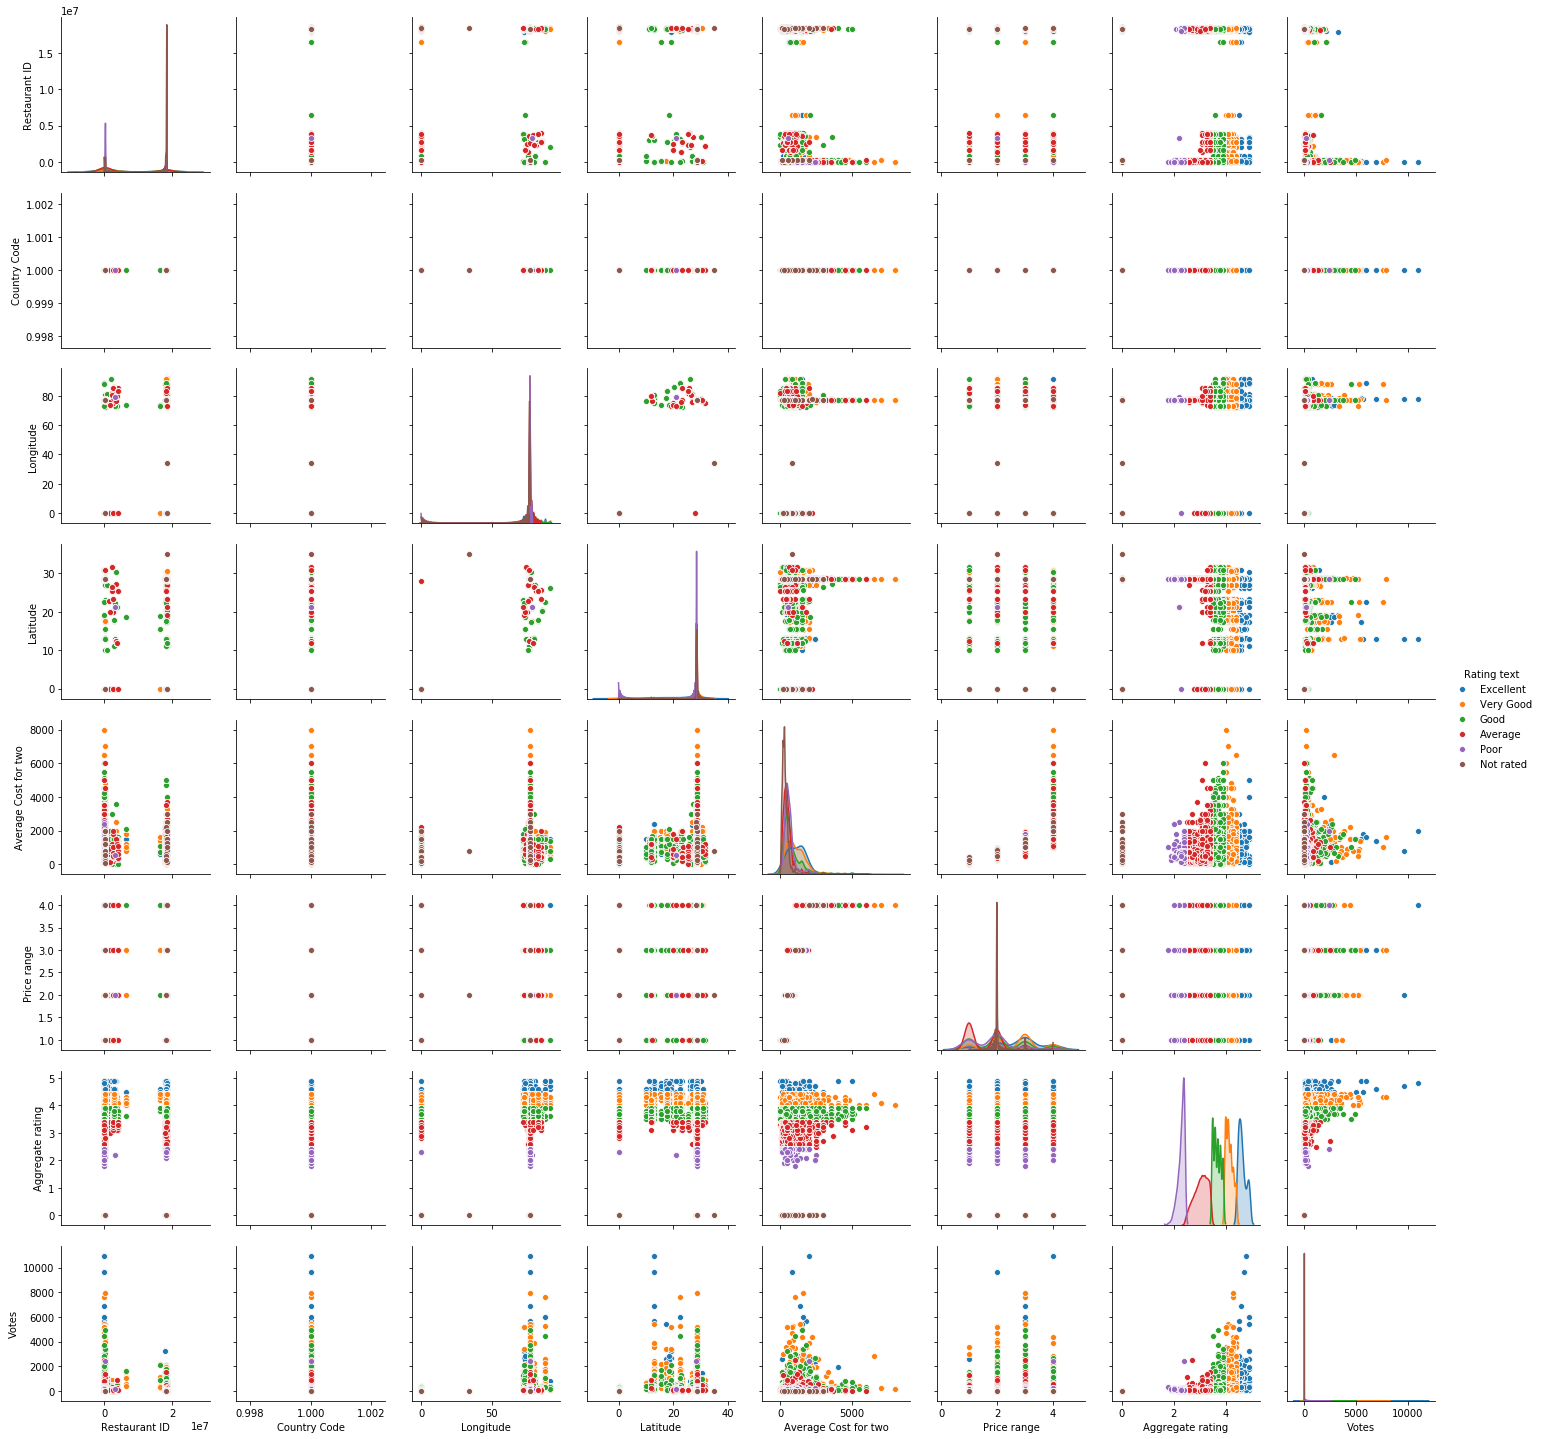

In [9]:
print(df_zomato_india.columns)
sns.pairplot(df_zomato_india,diag_kind="kde",hue='Rating text', hue_order=['Excellent','Very Good','Good', 'Average','Poor','Not rated']) # Similar to scatter plot but different hues for the points depending on the Rating Text

### Plot histogram on price based on rating

Text(0.5, 0, 'Average Cost for two')

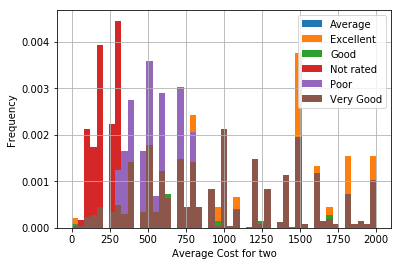

In [46]:
fig,axis = plt.subplots() #initializes a figure and an axis objects for the figure. The axis helps plot multiple histograms on the same plot.
bin_edges = np.linspace(0,2000,50) # specify the bin edges required while computing the histogram
temp = df_zomato_india[['Rating text','Average Cost for two']].groupby('Rating text')
temp.plot(kind='hist',density=True,ax=axis,bins=bin_edges,grid=True)
#temp.plot(kind='kde',ax=axis,grid=True)
axis.legend(temp.groups.keys())
axis.set_xlabel('Average Cost for two')

### Plot histogram of votes

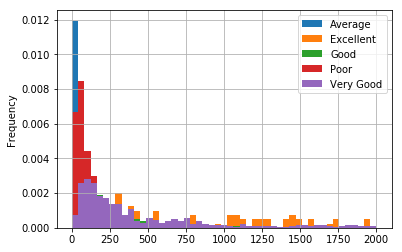

In [42]:
fig,axis = plt.subplots()
bin_edges = np.linspace(0,2000,50)
temp = df_zomato_india[['Rating text','Votes']].copy()
#print(temp.shape)
temp = temp[temp['Votes']>15]
#print(temp.shape)
temp = temp.groupby('Rating text')
temp.plot(kind='hist', density=True, ax=axis,bins=bin_edges,grid=True)
#print(temp.head())
axis.legend(temp.groups.keys())

### Plot restaurant locations

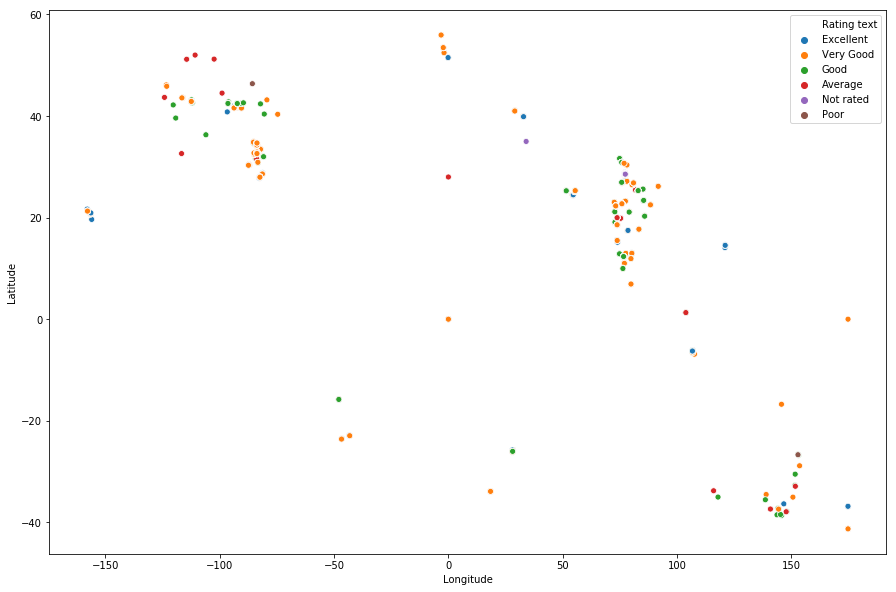

In [12]:
plt.figure(figsize=(15,10))
df_location = df_zomato[['Longitude','Latitude','Rating text']]
sns.scatterplot(x=df_location['Longitude'],y=df_location['Latitude'],hue=df_location['Rating text'])

### Split cuisines into separate string


          0         1         2       3     4     5     6     7
0    French  Japanese  Desserts    None  None  None  None  None
1  Japanese      None      None    None  None  None  None  None
2   Seafood     Asian  Filipino  Indian  None  None  None  None
3  Japanese     Sushi      None    None  None  None  None  None
4  Japanese    Korean      None    None  None  None  None  None
(9551, 8)
(76408,)
(19710,)


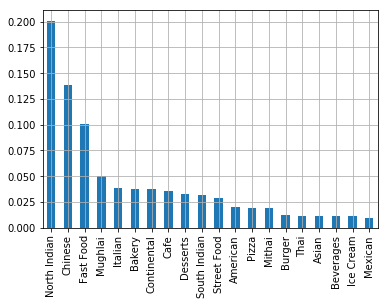

In [13]:
cuisines = df_zomato['Cuisines'].str.split(", ",expand=True) # split cuisines field into individual strings
print(cuisines[:5]) # cuisines column is now expanded to 8 columns

cuisines_matrix = cuisines.to_numpy(copy=True) #convert to numpy array to combine the columns
print(cuisines_matrix.shape)
cuisines_matrix=cuisines_matrix.reshape((cuisines_matrix.size,)) # convert the 2-dimensional array to a single dimensional array
print(cuisines_matrix.shape)

cuisines_series=pd.Series(cuisines_matrix) # convert numpy array back to pandas series
cuisines_series.dropna(inplace=True) # remove the empty strings
print(cuisines_series.shape)
cuisines_series.value_counts(normalize=True)[:20].plot(kind='bar', grid=True) # count the occurance of each string and plot the count of top 20 strings

### Simple classification

['Average' 'Excellent' 'Good' 'Poor' 'Very Good']
Classification score =  0.6254742547425475


[Text(279.0, 453.0, 'Votes <= 51.5\nentropy = 0.601\nsamples = 4302\nvalue = [2344, 78, 1278, 120, 482]\nclass = Average'),
 Text(139.5, 271.8, 'Votes <= 17.5\nentropy = 0.308\nsamples = 2101\nvalue = [1722, 2, 294, 49, 34]\nclass = Average'),
 Text(69.75, 90.59999999999997, 'entropy = 0.045\nsamples = 956\nvalue = [934, 0, 14, 8, 0]\nclass = Average'),
 Text(209.25, 90.59999999999997, 'entropy = 0.464\nsamples = 1145\nvalue = [788, 2, 280, 41, 34]\nclass = Average'),
 Text(418.5, 271.8, 'Votes <= 152.5\nentropy = 0.677\nsamples = 2201\nvalue = [622, 76, 984, 71, 448]\nclass = Good'),
 Text(348.75, 90.59999999999997, 'entropy = 0.634\nsamples = 1126\nvalue = [481, 9, 466, 60, 110]\nclass = Average'),
 Text(488.25, 90.59999999999997, 'entropy = 0.648\nsamples = 1075\nvalue = [141, 67, 518, 11, 338]\nclass = Good')]

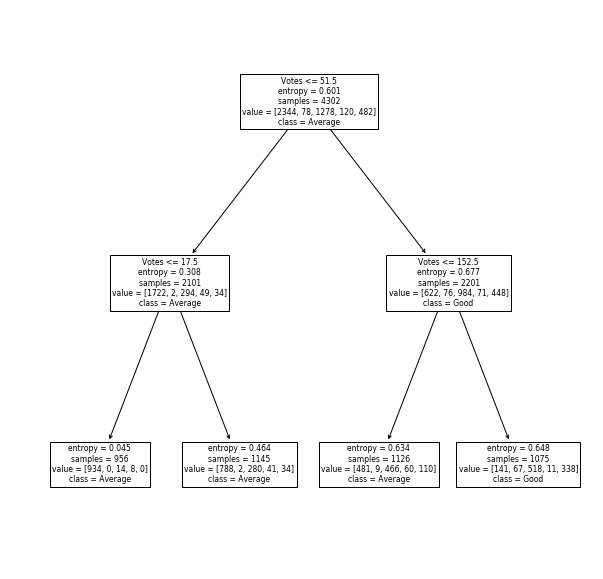

In [14]:

import sklearn
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

class_data = df_zomato_india[['Rating text','Votes','Average Cost for two','Aggregate rating']]

class_data = class_data[class_data['Votes']>5]

#data_array = df.to_numpy() # convert pandas dataframe to a numpy array
x_data = class_data[['Votes','Average Cost for two']] #
y_data = class_data[['Rating text']]

data_labels = class_data.columns

x_labels = data_labels[1:]
#y_labels = ['non-disease','disease']


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3,random_state=42) # split the data into training and testing samples. 40% of the samples are set aside for testing and 60% is used for training.

classifier = DecisionTreeClassifier(max_depth=2) #LogisticRegression(penalty='l1')
classifier.fit(x_train,y_train) #y_train[:,0] used only because fit() expects the labels to be a 1d array and not a column vector.
print(classifier.classes_)


print("Classification score = ", classifier.score(x_test,y_test))
plt.figure(figsize=(10,10)) #Works for DecisionTreeClassifier
sklearn.tree.plot_tree(classifier.fit(x_train, y_train),feature_names=x_labels,class_names=classifier.classes_) #Works for DecisionTreeClassifier

## Chronic Kidney Disease Dataset
* Source -  https://archive.ics.uci.edu/ml/datasets/chronic_kidney_disease

#### Import required modules

In [0]:
import numpy as np
import pandas as pd
from scipy.io import arff



#### Download the dataset from the source, uncompress, fix minor errors

In [16]:
!rm -rf Chronic* chronic*
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00336/Chronic_Kidney_Disease.rar
!unrar e Chronic_Kidney_Disease.rar
!sed  -i '/,,/s/,,/,/' chronic_kidney_disease.arff #The dataset is corrputed, hence needs this fix.
!sed  -i '/,,/s/,,/,/' chronic_kidney_disease_full.arff

--2019-07-21 19:32:55--  https://archive.ics.uci.edu/ml/machine-learning-databases/00336/Chronic_Kidney_Disease.rar
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19260 (19K) [application/x-httpd-php]
Saving to: ‘Chronic_Kidney_Disease.rar’

Chronic_Kidney_Dise 100%[===================>]  18.81K  --.-KB/s    in 0.06s   

2019-07-21 19:32:55 (293 KB/s) - ‘Chronic_Kidney_Disease.rar’ saved [19260/19260]


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from Chronic_Kidney_Disease.rar

Extracting  chronic_kidney_disease.arff                                   42%  OK 
Extracting  chronic_kidney_disease.info.txt                               49%  OK 
Extracting  chronic_kidney_disease_full.arff                              99%  OK 
All OK


#### Load the data into Python

In [17]:
!ls -l 
import pandas as pd
from scipy.io import arff

data = arff.loadarff('chronic_kidney_disease.arff')
df = pd.DataFrame(data[0])
print("Size of Dataset = ", df.shape)
df.head()

total 2328
-rw-r--r-- 1 root root   44267 Jul 21 19:33 chronic_kidney_disease.arff
-rw-r--r-- 1 root root   47276 Jul 21 19:33 chronic_kidney_disease_full.arff
-rw-r--r-- 1 root root    2924 Jul  4  2015 chronic_kidney_disease.info.txt
-rw-r--r-- 1 root root   19260 Jul  4  2015 Chronic_Kidney_Disease.rar
drwxr-xr-x 1 root root    4096 Jul  3 16:14 sample_data
-rw-r--r-- 1 root root 2257316 Jul 21 19:32 zomato.csv
Size of Dataset =  (400, 25)


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,b'1.020',b'1',b'0',b'?',b'normal',b'notpresent',b'notpresent',121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,b'yes',b'yes',b'no',b'good',b'no',b'no',b'ckd'
1,7.0,50.0,b'1.020',b'4',b'0',b'?',b'normal',b'notpresent',b'notpresent',NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN,b'no',b'no',b'no',b'good',b'no',b'no',b'ckd'
2,62.0,80.0,b'1.010',b'2',b'3',b'normal',b'normal',b'notpresent',b'notpresent',423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN,b'no',b'yes',b'no',b'poor',b'no',b'yes',b'ckd'
3,48.0,70.0,b'1.005',b'4',b'0',b'normal',b'abnormal',b'present',b'notpresent',117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,b'yes',b'no',b'no',b'poor',b'yes',b'yes',b'ckd'
4,51.0,80.0,b'1.010',b'2',b'0',b'normal',b'normal',b'notpresent',b'notpresent',106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,b'no',b'no',b'no',b'good',b'no',b'no',b'ckd'


#### Clean up data - Assign numerical values to some columns represented as strings

In [18]:
# Map text to 1/0 and do some cleaning
df['sg'] = df['sg'].replace(to_replace={b'1.005':1.005,b'1.010':1.010,b'1.015':1.015,b'1.020':1.020,b'1.025':1.025}) # assign numeric values to string representations
df['al'] = df['al'].replace(to_replace={b'0':0,b'1':1,b'2':2,b'3':3,b'4':4,b'5':5})
df['su'] = df['su'].replace(to_replace={b'0':0,b'1':1,b'2':2,b'3':3,b'4':4,b'5':5})
df[['htn','dm','cad','pe','ane']] = df[['htn','dm','cad','pe','ane']].replace(to_replace={b'yes':1,b'no':0})
df[['rbc','pc']] = df[['rbc','pc']].replace(to_replace={b'abnormal':1,b'normal':0})
df[['pcc','ba']] = df[['pcc','ba']].replace(to_replace={b'present':1,b'notpresent':0})
df[['appet']] = df[['appet']].replace(to_replace={b'good':1,b'poor':0,b'no':np.nan})
df['class'] = df['class'].replace(to_replace={b'ckd':1.0,b'ckd\t':1.0,b'notckd':0.0,b'no':0.0})



df.dtypes
df.head()


# Further cleaning
# df['pe'] = df['pe'].replace(to_replace='good',value=0) # Not having pedal edema is good
# df['appet'] = df['appet'].replace(to_replace='no',value=0)
# df['cad'] = df['cad'].replace(to_replace='\tno',value=0)
# df['dm'] = df['dm'].replace(to_replace={'\tno':0,'\tyes':1,' yes':1, '':np.nan})

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.02,1,0,b'?',0,0,0,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,1,1,0,1,0,0,1
1,7.0,50.0,1.02,4,0,b'?',0,0,0,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN,0,0,0,1,0,0,1
2,62.0,80.0,1.01,2,3,0,0,0,0,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN,0,1,0,0,0,1,1
3,48.0,70.0,1.005,4,0,0,1,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,0,0,0,1,1,1
4,51.0,80.0,1.01,2,0,0,0,0,0,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,0,0,0,1,0,0,1


#### Clean up data
* Convert all features to numeric values. Values that cannot be converted are assigned as Not a Number (NaN) 
* All entries marked as NaN are assigned the mean value.

In [19]:
df.columns= ['Age', 'Blood Pressure', 'Specific Gravity', 'Albumin', 'Sugar', 'Red Blood Cells', 'Pus Cell','Pus cell clumps','Bacteria','Blood glucose random','blood urea','serum creatinine', 'sodium', 'potassium','hemoglobin','packed cell volume','white blood cell count','red blood cell count','hypertension','diabetes mellitus','coronary artery disease','appetite','pedal edema','anemia','CKD' ]

print(df.dtypes)  # display the data type of each column
df = df.apply(pd.to_numeric,errors='coerce') #convert all entries to numeric values
print(df.isna().any()) # display if any column have nan values
print(df.dtypes) # display the data type of each column
print(df.shape)  # display the number of rows and columns in the dataset
df.describe()

df = df.fillna(df.mean())  #fill the missing data using the mean values
#df = df.dropna()  # Drop entries that have NaN values
print(df.shape)
df.describe()

Age                        float64
Blood Pressure             float64
Specific Gravity            object
Albumin                     object
Sugar                       object
Red Blood Cells             object
Pus Cell                    object
Pus cell clumps             object
Bacteria                    object
Blood glucose random       float64
blood urea                 float64
serum creatinine           float64
sodium                     float64
potassium                  float64
hemoglobin                 float64
packed cell volume         float64
white blood cell count     float64
red blood cell count       float64
hypertension                object
diabetes mellitus           object
coronary artery disease     object
appetite                    object
pedal edema                 object
anemia                      object
CKD                         object
dtype: object
Age                         True
Blood Pressure              True
Specific Gravity            True
Albumin     

,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus cell clumps,Bacteria,Blood glucose random,blood urea,serum creatinine,sodium,potassium,hemoglobin,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,CKD
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,0.189516,0.226866,0.106061,0.055556,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435,0.369347,0.344221,0.085427,0.794486,0.190476,0.150376,0.625000
std,16.974966,13.476298,0.005369,1.272318,1.029487,0.308983,0.383750,0.306755,0.228199,74.782634,49.285887,5.617490,9.204273,2.819783,2.716171,8.151081,2523.219976,0.840314,0.482023,0.474518,0.279166,0.404077,0.392677,0.357440,0.484729
min,2.000000,50.000000,1.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,70.000000,1.015000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,101.000000,27.000000,0.900000,135.000000,4.000000,10.875000,34.000000,6975.000000,4.500000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,54.000000,78.234536,1.017408,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,44.000000,1.400000,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,64.000000,80.000000,1.020000,2.000000,0.450142,0.189516,0.226866,0.000000,0.000000,150.000000,61.750000,3.072454,141.000000,4.800000,14.625000,44.000000,9400.000000,5.100000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:

#pd.plotting.scatter_matrix(df, alpha = 0.3, figsize = (30,10), diagonal = 'kde');

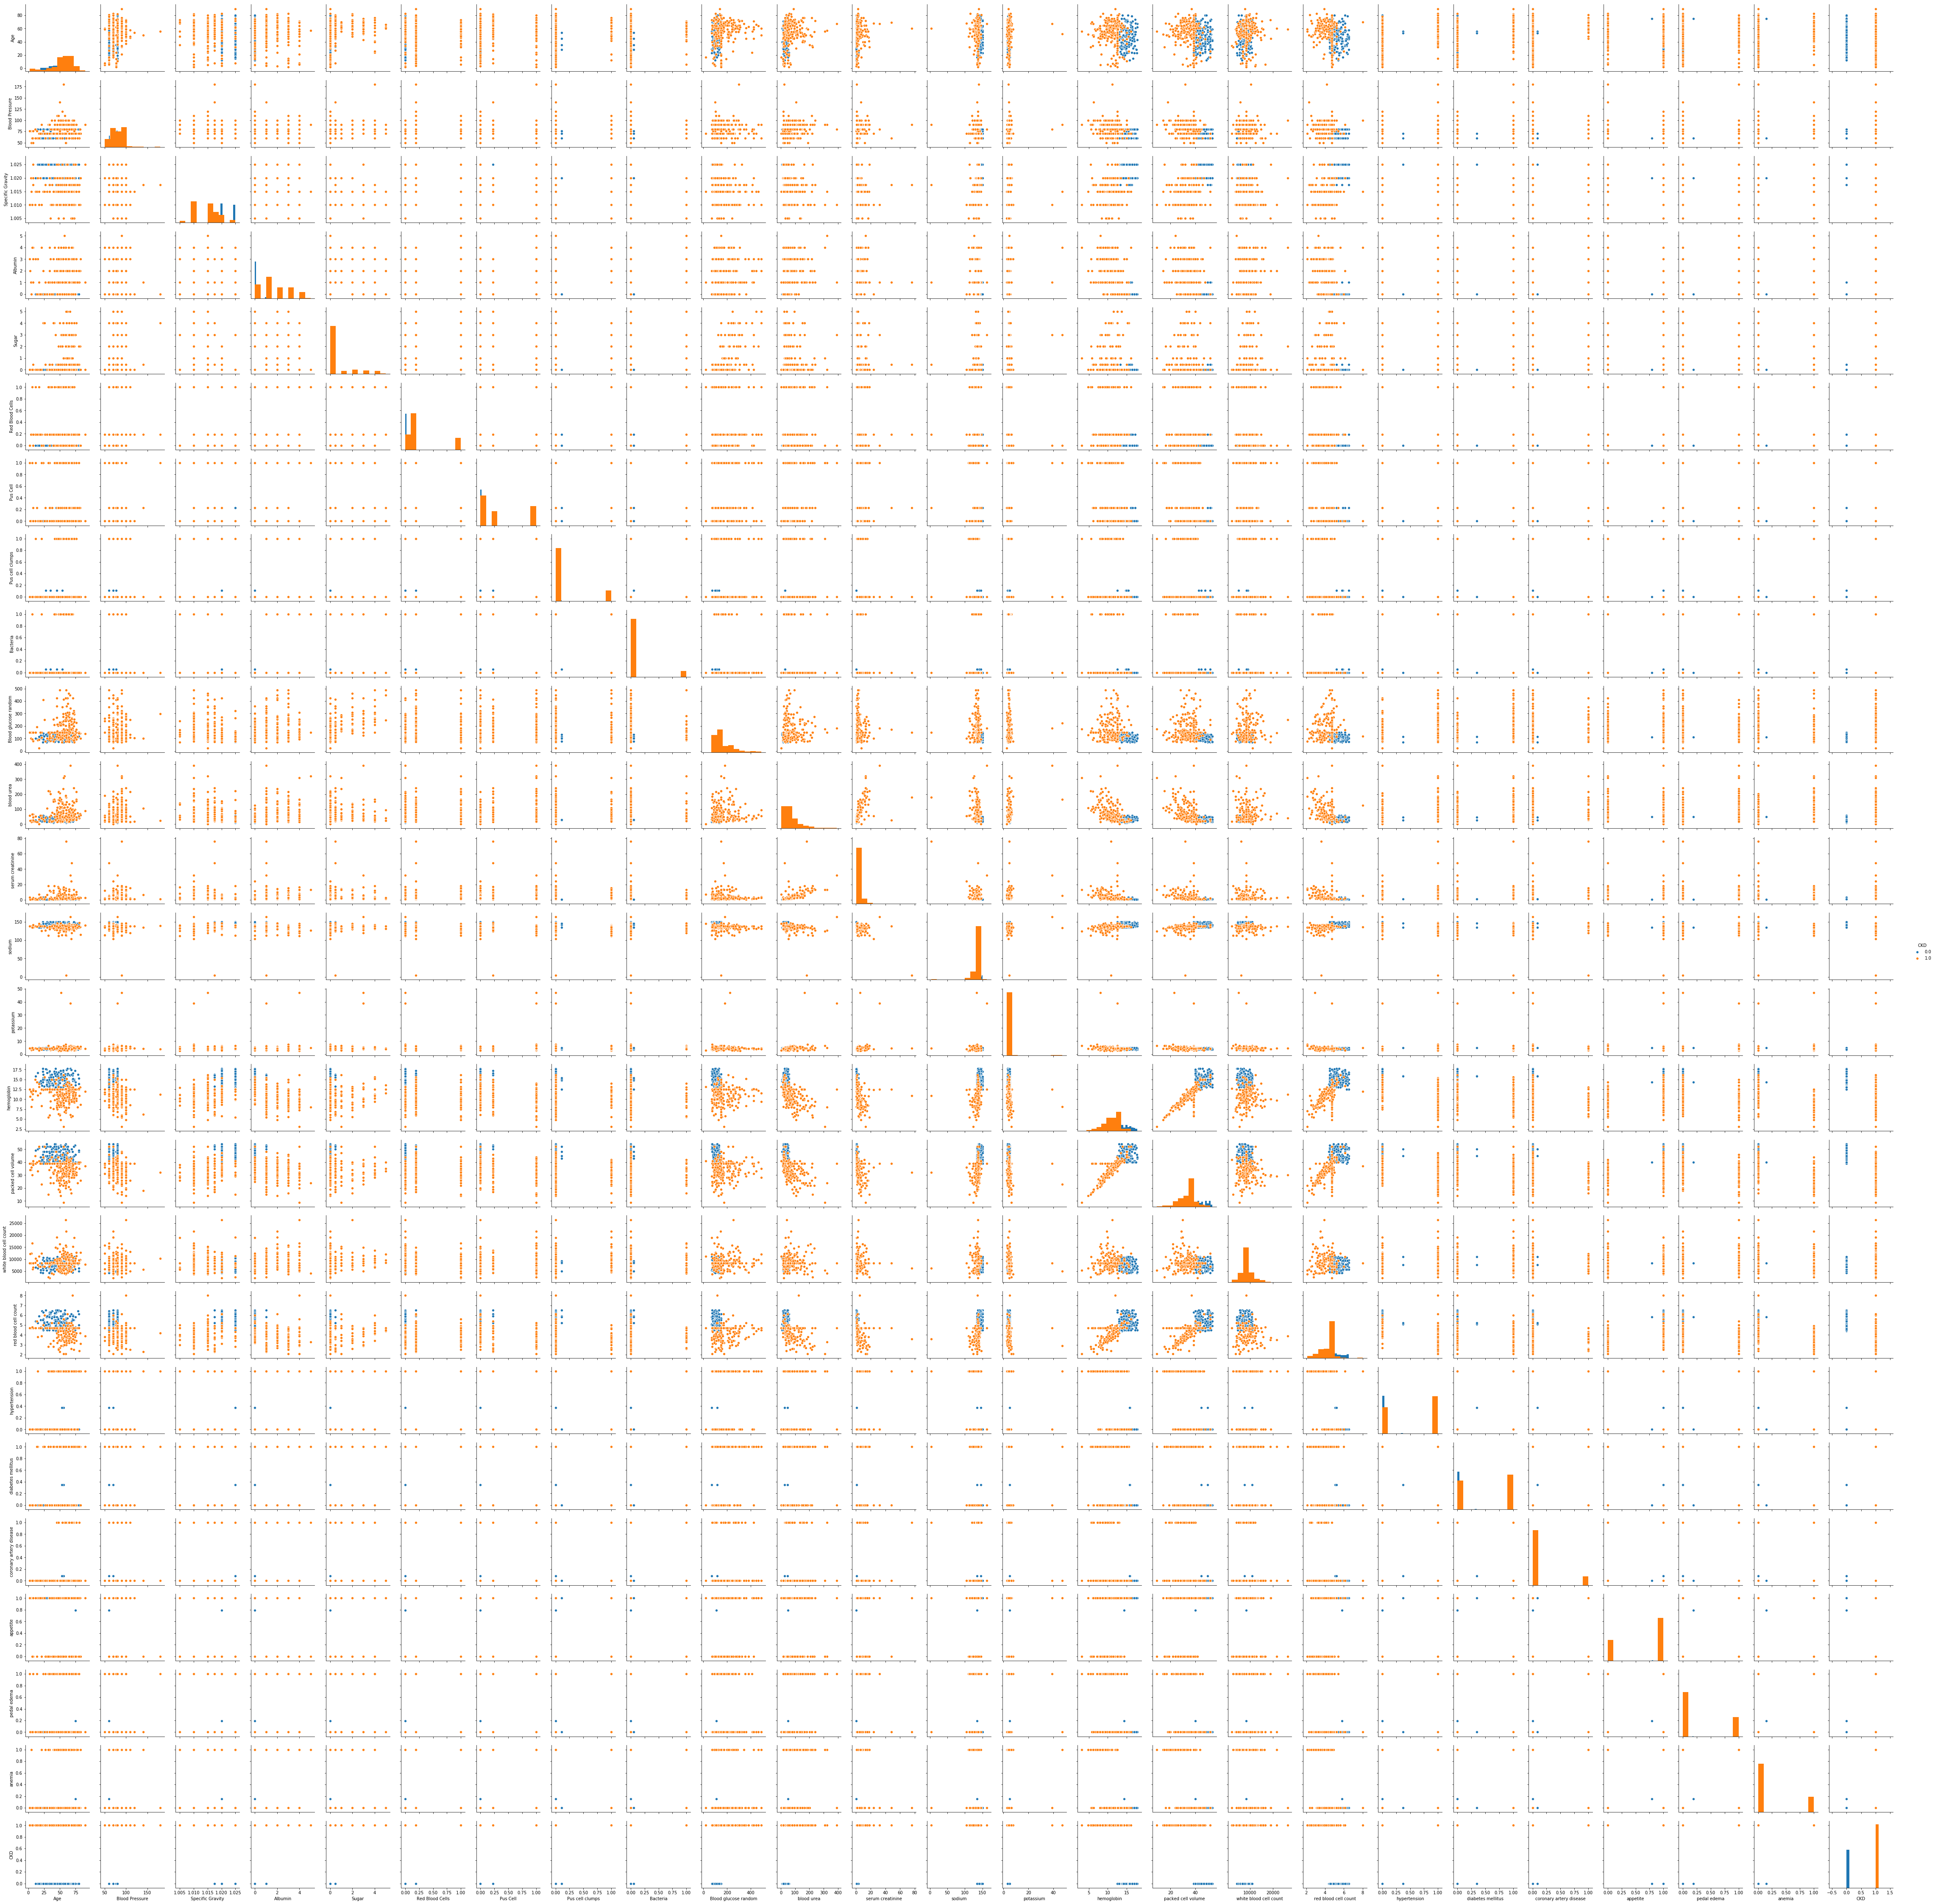

In [21]:
sns.pairplot(df, hue="CKD",diag_kind="hist")

#### A basic classification task

Classification score =  0.9916666666666667


[Text(279.0, 453.0, 'hemoglobin <= 12.95\nentropy = 0.957\nsamples = 280\nvalue = [106, 174]\nclass = disease'),
 Text(139.5, 271.8, 'serum creatinine <= 1.15\nentropy = 0.229\nsamples = 162\nvalue = [6, 156]\nclass = disease'),
 Text(69.75, 90.59999999999997, 'entropy = 0.795\nsamples = 25\nvalue = [6, 19]\nclass = disease'),
 Text(209.25, 90.59999999999997, 'entropy = 0.0\nsamples = 137\nvalue = [0, 137]\nclass = disease'),
 Text(418.5, 271.8, 'Specific Gravity <= 1.016\nentropy = 0.616\nsamples = 118\nvalue = [100, 18]\nclass = non-disease'),
 Text(348.75, 90.59999999999997, 'entropy = 0.0\nsamples = 16\nvalue = [0, 16]\nclass = disease'),
 Text(488.25, 90.59999999999997, 'entropy = 0.139\nsamples = 102\nvalue = [100, 2]\nclass = non-disease')]

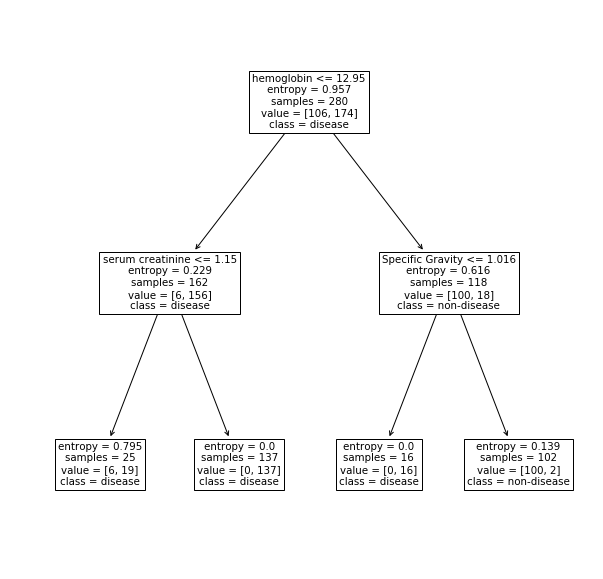

In [22]:
import sklearn
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


data_array = df.to_numpy() # convert pandas dataframe to a numpy array
x_data = data_array[:,0:-1] #
y_data = data_array[:,-1]

data_labels = df.columns

x_labels = data_labels[0:-1]
y_labels = ['non-disease','disease']


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3,random_state=42) # split the data into training and testing samples. 40% of the samples are set aside for testing and 60% is used for training.

classifier = DecisionTreeClassifier(criterion='entropy', max_depth=2) #LogisticRegression(penalty='l1')
classifier.fit(x_train,y_train) #y_train[:,0] used only because fit() expects the labels to be a 1d array and not a column vector.

print("Classification score = ", classifier.score(x_test,y_test))
plt.figure(figsize=(10,10)) #Works for DecisionTreeClassifier
sklearn.tree.plot_tree(classifier.fit(x_train, y_train),feature_names=x_labels,class_names=y_labels) #Works for DecisionTreeClassifier


## MySpeed [dataset](https://myspeed.trai.gov.in/) from TRAI - [May2019](https://myspeed.trai.gov.in/download/may19_publish.csv)

TRAI has developed an app called MySpeed that users can install in their mobiles to record netowrk speeds. This is a fairly large dataset with around 50 lakh entries.

### Download dataset

In [23]:
! rm -rf may19_publish*
! wget https://myspeed.trai.gov.in/download/may19_publish.csv
! ls -l

--2019-07-21 19:35:34--  https://myspeed.trai.gov.in/download/may19_publish.csv
Resolving myspeed.trai.gov.in (myspeed.trai.gov.in)... 164.100.158.177
Connecting to myspeed.trai.gov.in (myspeed.trai.gov.in)|164.100.158.177|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18698634 (18M) [text/csv]
Saving to: ‘may19_publish.csv’

may19_publish.csv   100%[===================>]  17.83M  1.93MB/s    in 10s     

2019-07-21 19:35:46 (1.75 MB/s) - ‘may19_publish.csv’ saved [18698634/18698634]

total 20592
-rw-r--r-- 1 root root    44267 Jul 21 19:33 chronic_kidney_disease.arff
-rw-r--r-- 1 root root    47276 Jul 21 19:33 chronic_kidney_disease_full.arff
-rw-r--r-- 1 root root     2924 Jul  4  2015 chronic_kidney_disease.info.txt
-rw-r--r-- 1 root root    19260 Jul  4  2015 Chronic_Kidney_Disease.rar
-rw-r--r-- 1 root root 18698634 Jun 19 13:32 may19_publish.csv
drwxr-xr-x 1 root root     4096 Jul  3 16:14 sample_data
-rw-r--r-- 1 root root  2257316 Jul 21 19:32 zomato

### Load dataset using Padas

In [24]:
import pandas as pd
df_myspeed = pd.read_csv('https://myspeed.trai.gov.in/download/may19_publish.csv')
print("Size of Dataset = ", df_myspeed.shape)
df_myspeed.columns=['Service Provider',	'Technology',	'Test_type',	'Data Speed',	'Signal_strength',	'LSA'] # Name columns
df_myspeed[:5]

Size of Dataset =  (543524, 6)


,Service Provider,Technology,Test_type,Data Speed,Signal_strength,LSA
0,JIO,4G,download,67898.0,-70,Delhi
1,JIO,4G,download,39782.0,-70,Delhi
2,JIO,4G,download,53185.0,-70,Delhi
3,JIO,4G,upload,8876.0,-70,Delhi
4,JIO,4G,upload,5780.0,-70,Delhi


In [25]:
print(df_myspeed.dtypes)
df_myspeed[['Signal_strength']] = df_myspeed[['Signal_strength']].apply(pd.to_numeric,errors='coerce') #convert all entries to numeric values
print(df_myspeed.dtypes)

Service Provider     object
Technology           object
Test_type            object
Data Speed          float64
Signal_strength      object
LSA                  object
dtype: object
Service Provider     object
Technology           object
Test_type            object
Data Speed          float64
Signal_strength     float64
LSA                  object
dtype: object


In [26]:
print("Number of records per operator : \n", df_myspeed['Service Provider'].value_counts())
print("Technology counts = \n", df_myspeed['Technology'].value_counts())
print("Test_type = \n", df_myspeed['Test_type'].value_counts())
print("Service Area = \n", df_myspeed['LSA'].value_counts())


Number of records per operator : 
 JIO         335615
AIRTEL       88290
VODAFONE     54640
IDEA         47461
CELLONE      17488
DOLPHIN         30
Name: Service Provider, dtype: int64
Technology counts = 
 4G    514171
3G     29353
Name: Technology, dtype: int64
Test_type = 
 download    271771
upload      271753
Name: Test_type, dtype: int64
Service Area = 
 Maharashtra         61563
UP East             60382
Delhi               48563
Andhra Pradesh      33458
Kerala              32481
Karnataka           32125
Gujarat             31507
Tamil Nadu          25757
Madhya Pradesh      24090
Rajasthan           19417
UP West             19165
Kolkata             15852
Orissa              15098
West Bengal         14759
Punjab              13935
Mumbai              12978
Haryana             10501
Bihar               10169
Assam                5959
North East           5867
Chennai              5779
Himachal Pradesh     5415
Jammu & Kashmir      4447
Name: LSA, dtype: int64


In [27]:
df_myspeed.describe()

,Data Speed,Signal_strength
count,543524.000000,470489.000000
mean,9834.304601,-88.835837
std,16765.086784,15.481022
min,0.000000,-112.000000
25%,923.000000,-101.000000
50%,3424.000000,-92.000000
75%,8917.000000,-79.000000
max,144774.000000,-50.000000


### Analyse downloaded data

In [28]:
df_myspeed.dropna(inplace=True) #Lets drop records with missing data
#print(df_myspeed.isna().any()) # display if any column have nan values
df_myspeed_4G_download = df_myspeed[(df_myspeed['Test_type']=='download') & (df_myspeed['Technology']=='4G')] # Filter only download records
#print(df_myspeed_4G_download.head())
#print(df_myspeed_4G_download.dtypes)
#print("Number of download records = ", df_myspeed_4G_download.shape)
df_myspeed_4G_download.describe()

,Data Speed,Signal_strength
count,208299.000000,208299.000000
mean,15667.038454,-89.235834
std,21644.101970,15.577764
min,0.000000,-112.000000
25%,1307.000000,-102.000000
50%,5430.000000,-93.000000
75%,19327.500000,-79.000000
max,144774.000000,-50.000000


### Scatter plot of different records

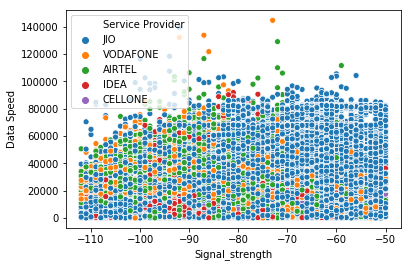

In [29]:
import seaborn as sns
sns.scatterplot(x=df_myspeed_4G_download['Signal_strength'],y=df_myspeed_4G_download['Data Speed'],hue=df_myspeed_4G_download['Service Provider'])


### Mean data speed and signal strength for different service providers

In [30]:
df_myspeed_4G_download.groupby(['Service Provider']).mean()

,Data Speed,Signal_strength
Service Provider,,
AIRTEL,9647.134810,-94.418136
CELLONE,5767.320092,-89.862406
IDEA,6287.470056,-93.011701
JIO,19639.607509,-86.717036
VODAFONE,8326.018174,-93.951342


### Probability density plots

                    Data Speed
Service Provider              
JIO               19639.607509
VODAFONE           8326.018174
AIRTEL             9647.134810
IDEA               6287.470056
CELLONE            5767.320092


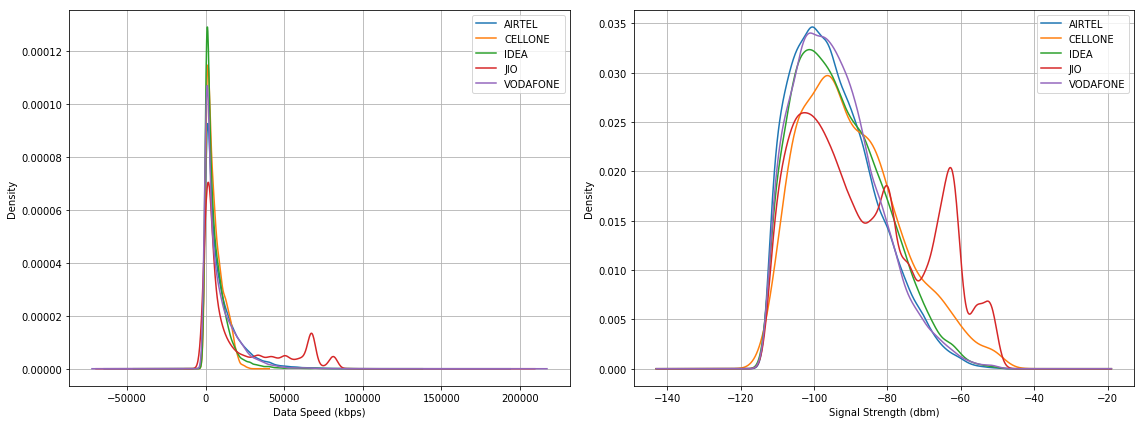

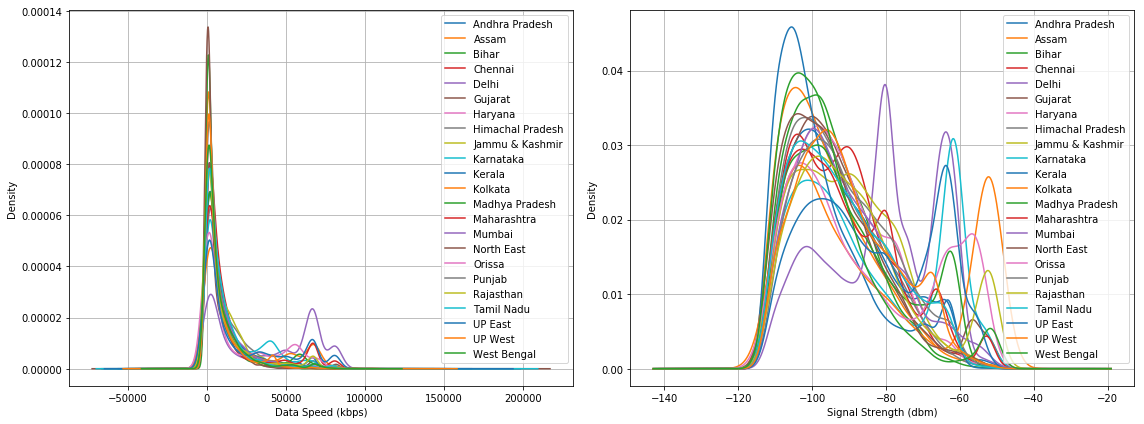

In [31]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(16,6))
service_providers_str =  df_myspeed_4G_download['Service Provider'].unique() # get name of Service Providers
service_providers_str.sort()
print(df_myspeed_4G_download[['Data Speed','Service Provider']].groupby(['Service Provider'],sort=False).mean())

df_myspeed_4G_download[['Data Speed','Service Provider']].groupby(['Service Provider']).plot(kind='kde',ax=axis1,grid=True)
df_myspeed_4G_download[['Signal_strength','Service Provider']].groupby(['Service Provider']).plot(kind='kde',ax=axis2,grid=True)

axis1.legend(service_providers_str)
axis2.legend(service_providers_str)
axis1.set_xlabel('Data Speed (kbps)')
axis2.set_xlabel('Signal Strength (dbm)')
plt.tight_layout()
plt.show()

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(16,6))
LSA_str =  df_myspeed_4G_download['LSA'].unique() # get name of Service Areas
LSA_str.sort()

df_myspeed_4G_download[['Data Speed','LSA']].groupby(['LSA']).plot(kind='kde',ax=axis1,grid=True)
df_myspeed_4G_download[['Signal_strength','LSA']].groupby(['LSA']).plot(kind='kde',ax=axis2,grid=True)

axis1.legend(LSA_str)
axis2.legend(LSA_str)
axis1.set_xlabel('Data Speed (kbps)')
axis2.set_xlabel('Signal Strength (dbm)')
plt.tight_layout()
plt.show()

### Extract a subset of the data

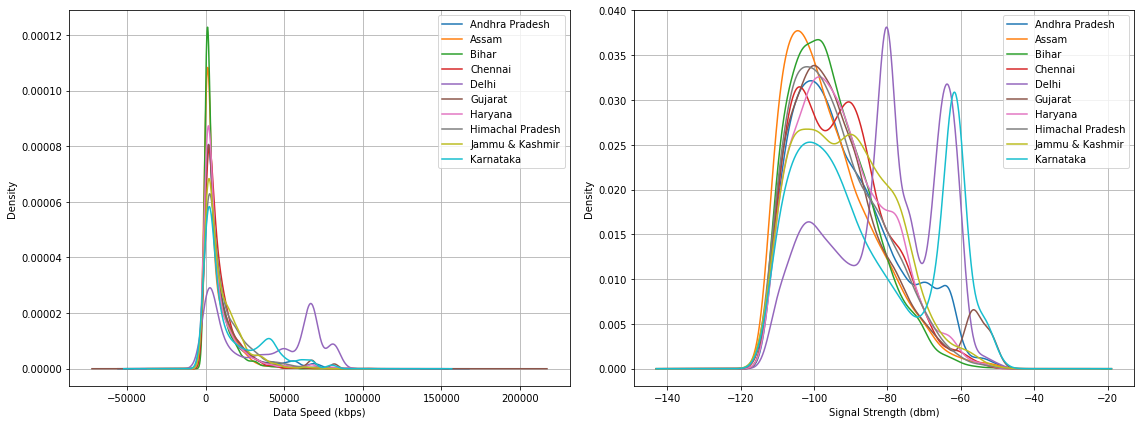

In [32]:

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(16,6))
LSA_str =  df_myspeed_4G_download['LSA'].unique() # get name of Service Areas
LSA_str.sort()

df_myspeed_4G_download[df_myspeed_4G_download['LSA'].isin(LSA_str[0:10])][['Data Speed','LSA']].groupby(['LSA']).plot(kind='kde',ax=axis1,grid=True)
df_myspeed_4G_download[df_myspeed_4G_download['LSA'].isin(LSA_str[0:10])][['Signal_strength','LSA']].groupby(['LSA']).plot(kind='kde',ax=axis2,grid=True)

axis1.legend(LSA_str[0:10])
axis2.legend(LSA_str[0:10])
axis1.set_xlabel('Data Speed (kbps)')
axis2.set_xlabel('Signal Strength (dbm)')
plt.tight_layout()
plt.show()

### Plot data speed vs signal strength for different Service Providers 

                    Data Speed                ...                            
Service Provider        AIRTEL       CELLONE  ...           JIO      VODAFONE
count                63.000000     63.000000  ...     63.000000     63.000000
mean              12626.158821   7419.661187  ...  24083.059699  11307.439040
std                4882.154650   3759.405850  ...  19602.764802   5216.374495
min                5231.921951   2531.653061  ...   2816.548881   5330.663636
25%                9008.866200   4294.967040  ...   6013.459784   7733.894243
50%               12177.554243   6729.846154  ...  17288.788379  10522.440000
75%               15283.287070   9082.700000  ...  45065.792535  12323.112500
max               33747.000000  18543.000000  ...  58714.640884  31589.000000

[8 rows x 5 columns]


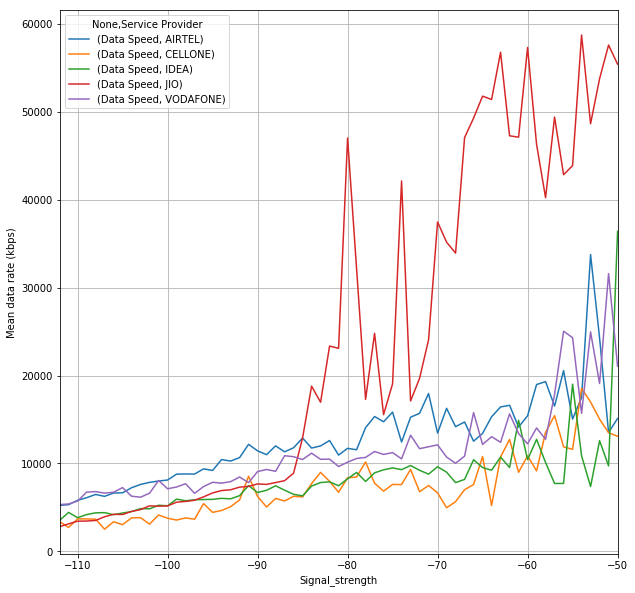

In [48]:
df_myspeed_download_mean=df_myspeed_4G_download.groupby(['Signal_strength','Service Provider']).mean()
#print(df_myspeed_download_mean.index)
df_myspeed_download_mean.unstack(level=1).plot(grid=True,figsize=(10,10))
plt.ylabel('Mean data rate (kbps)')
print(df_myspeed_download_mean.unstack(level=1).describe())